In [1]:
import networkx as nx
import numpy as np
from src.em import em_algorithm
from graspologic.plot import adjplot
import pandas as pd
import matplotlib.pyplot as plt
import pickle

/home/theilo/Software/Miniconda/envs/PGM/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/theilo/Software/Miniconda/envs/PGM/lib/python3.11/site-packages/graspologic/models/edge_swaps.py:215: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  _edge_swap_numba = nb.jit(_edge_swap, nopython=False)


In [5]:
edges_data = "data/E-coli/Escherichia-coli_edge-list.txt"
labels_data = "data/E-coli/Escherichia-coli.txt"

# Nodes
with open(edges_data) as edgelist:
    nb_nodes = int(edgelist.readline().strip("Nb_nodes:"))
G = nx.Graph()
G.add_nodes_from(range(nb_nodes))

# Edges
with open(edges_data) as edgelist:
    partial_graph = nx.read_edgelist(edgelist)
for edge in partial_graph.edges():
    G.add_edge(int(edge[0]), int(edge[1]))

# Labels
with open(labels_data) as labels:
    labels = labels.readlines()[1:]
    labels = [label.strip() for label in labels]
    labels = np.array(labels)
assert len(labels) == len(G.nodes())
for i, label in enumerate(labels):
    G.nodes[i]["label"] = label

X = nx.adjacency_matrix(G).todense()

In [ ]:
Q = 21
alpha, pi, tau = em_algorithm(
    X, Q, n_init=1, iterations=10, implementation="pytorch_log"
)

In [4]:
with open("results/alpha.pkl", "wb") as f:
    pickle.dump(alpha, f)
with open("results/pi.pkl", "wb") as f:
    pickle.dump(pi, f)
with open("results/tau.pkl", "wb") as f:
    pickle.dump(tau, f)

In [3]:
with open("results/alpha.pkl", "rb") as f:
    alpha = pickle.load(f)
with open("results/pi.pkl", "rb") as f:
    pi = pickle.load(f)
with open("results/tau.pkl", "rb") as f:
    tau = pickle.load(f)

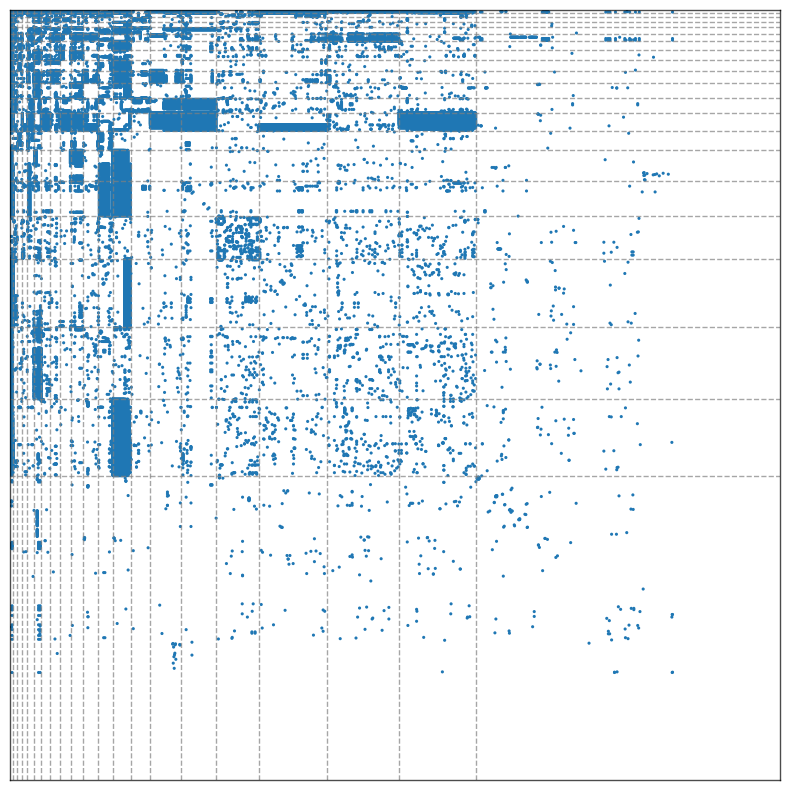

In [6]:
classification = tau.argmax(axis=1)

meta = pd.DataFrame(
    data={
        "Class": classification,
    },
)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(data=X, ax=ax, meta=meta, plot_type="scattermap", group=["Class"], ticks=False)
plt.savefig("images/escheria-coli.png")
plt.show()